In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

loading minist dataset and applying onehot encoding

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Shuvo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training the model

In [7]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9218 - loss: 0.2655 - val_accuracy: 0.9595 - val_loss: 0.1398
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9644 - loss: 0.1164 - val_accuracy: 0.9633 - val_loss: 0.1250
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9753 - loss: 0.0840 - val_accuracy: 0.9648 - val_loss: 0.1255
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9806 - loss: 0.0651 - val_accuracy: 0.9681 - val_loss: 0.1116
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9835 - loss: 0.0546 - val_accuracy: 0.9733 - val_loss: 0.1014
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0452 - val_accuracy: 0.9735 - val_loss: 0.1151
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9889 - loss: 0.0372 - val_accuracy: 0.9673 - val_loss: 0.1433
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9902 - loss: 0.0335 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.1137
Test accuracy: 0.9744


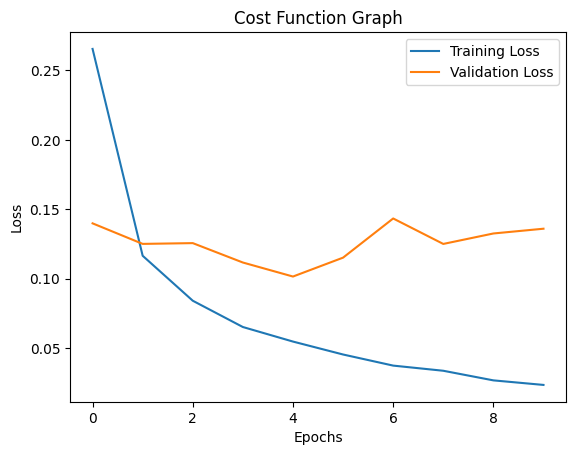

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost Function Graph')
plt.legend()
plt.show()